In [1]:
from typing import List, Optional

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import Image

import scipy
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import export_graphviz 
from graphviz import Source

1. Data Loading
2. Feature Visualizations
3. Sleep Structure Analysis
4. Correlation Search
   - 4.1 Body/Brain Weight and Amount of Sleep
   - 4.2 Gestation and Amount of Sleep
   - 4.3 Danger Level and Amount of Sleep
   - 4.4 Correlation Matrix
5. Decision Tree and Feature Importance
6. Conclusions

## 1. Data Loading

In [2]:
data_dir = "./data/"
data_path = data_dir + "sleep_in_mammals.csv"

In [3]:
df = pd.read_csv(data_path)
print("Shape:", df.shape)

Shape: (62, 11)


In [4]:
df.head()

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       62 non-null     object 
 1   body_wt       62 non-null     float64
 2   brain_wt      62 non-null     float64
 3   non_dreaming  48 non-null     float64
 4   dreaming      50 non-null     float64
 5   total_sleep   58 non-null     float64
 6   life_span     58 non-null     float64
 7   gestation     58 non-null     float64
 8   predation     62 non-null     int64  
 9   exposure      62 non-null     int64  
 10  danger        62 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.5+ KB


### Feature Description

**species**: species of animal </br>
**body_wt**: body weight in kg </br>
**brain_wt**: brain weight in g </br>
**non_dreaming**: slow wave ("nondreaming") sleep (hrs/day) </br>
**dreaming**: paradoxical ("dreaming") sleep (hrs/day) </br>
**total_sleep**: total sleep (hrs/day)  (sum of slow wave and paradoxical sleep) </br>
**life_span**: maximum life span (years) </br>
**gestation**: gestation time (days) </br>

**predation**: predation index (1-5) </br>
                1 = minimum (least likely to be preyed upon) </br>
                5 = maximum (most likely to be preyed upon) </br>

**exposure**: sleep exposure index (1-5) </br>
                1 = least exposed (e.g. animal sleeps in a
                    well-protected den) </br>
                5 = most exposed </br>

**danger**: overall danger index (1-5) </br>
                (based on the above two indices and other information) </br>
                1 = least danger (from other animals) </br>
                5 = most danger (from other animals) </br>

## 2. Feature Visualizations

In [6]:
def plot_histogram(data: pd.DataFrame, x_label: str, title: str, fig_size: Optional[tuple] = (10, 4)):
    plt.figure(figsize=fig_size)
    sns.histplot(data, kde=True)
    plt.xlabel(x_label, fontsize=10, fontweight="bold")
    plt.ylabel("Number of Species", fontsize=10, fontweight="bold")
    plt.title(title, fontsize=11, fontweight="bold")
    plt.show()

In [7]:
def plot_scatterplot(data: pd.DataFrame, x_axis: str, y_axis: str, x_label: str, y_label: str, 
                     title: str, hue: Optional[str] = None, legend_title: Optional[str] = None):
    plt.figure(figsize=(5.5, 5.5))

    sns.scatterplot(x=x_axis, y=y_axis, data=data, hue=hue, edgecolor="black", alpha=0.7)

    plt.xlabel(x_label, fontsize=11, fontweight="bold")
    plt.ylabel(y_label, fontsize=11, fontweight="bold")
    plt.title(title, fontsize=12, fontweight="bold")
    if legend_title != None:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=legend_title)
    plt.show()

In [8]:
def plot_regplor(data: pd.DataFrame, x_axis: str, y_axis: str, x_label: str, y_label: str, title: str):
    plt.figure(figsize=(5.5, 5.5))

    sns.regplot(x=x_axis, y=y_axis, data=data)

    plt.xlabel(x_label, fontsize=11, fontweight="bold")
    plt.ylabel(y_label, fontsize=11, fontweight="bold")
    plt.title(title, fontsize=12, fontweight="bold")
    plt.show()

In [9]:
def plot_boxplot(data: pd.DataFrame, x_axis: str, y_axis: str, x_label: str, y_label: str):
    plt.figure(figsize=(5.5, 5.5))
    sns.boxplot(x=x_axis, y=y_axis, data=data)
    plt.xlabel(x_label, fontsize=11, fontweight="bold")
    plt.ylabel(y_label, fontsize=11, fontweight="bold")
    plt.show()

In [10]:
def plot_heatmap(data: pd.DataFrame, features: List[str]):
    sns.set(rc = {"figure.figsize":(12, 3)})
    sns.heatmap(data[features].corr(), annot = True, fmt=".2g",cmap="coolwarm")
    plt.show()

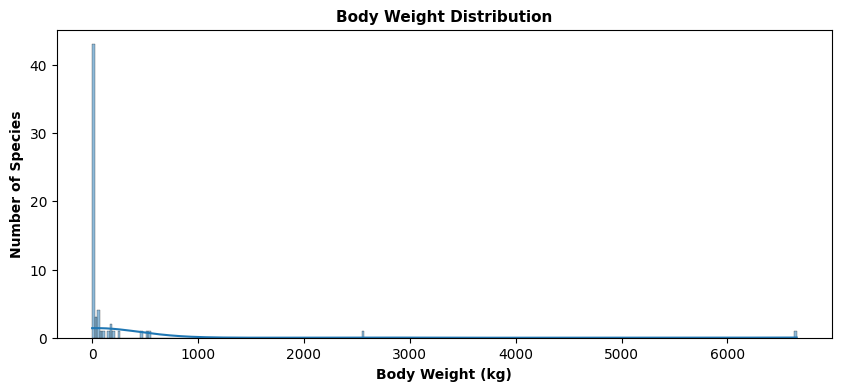

In [11]:
plot_histogram(df["body_wt"], x_label="Body Weight (kg)", title="Body Weight Distribution")

In [12]:
df[df["body_wt"] > 1000]

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.0,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
4,Asianelephant,2547.0,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


* <font size="4"> As we can see there are two outliers: African and Asian Elephants. Their body weight is over 1,000 kg.</font>

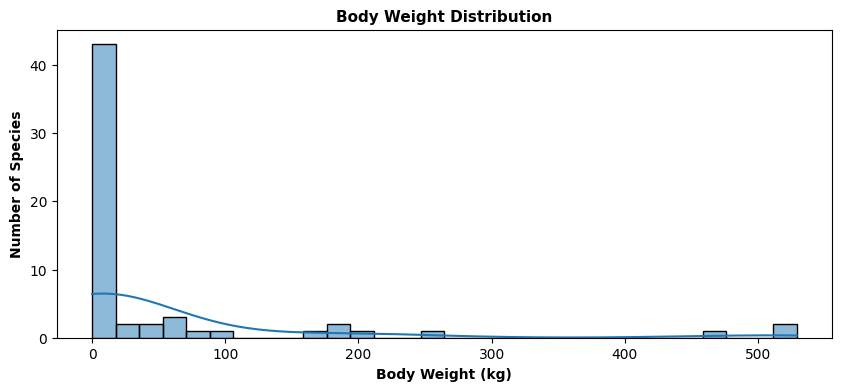

In [13]:
plot_histogram(df[df["body_wt"] < 1000]["body_wt"], x_label="Body Weight (kg)", title="Body Weight Distribution")

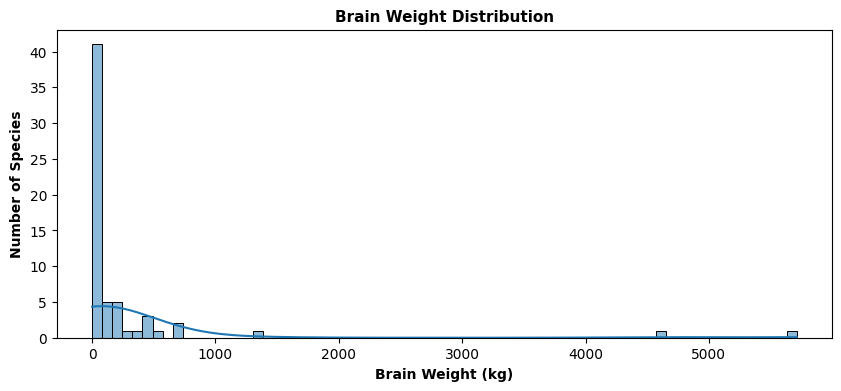

In [14]:
plot_histogram(df["brain_wt"], x_label="Brain Weight (kg)", title="Brain Weight Distribution")

In [15]:
df[df["brain_wt"] > 1000]

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.0,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
4,Asianelephant,2547.0,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
33,Man,62.0,1320.0,6.1,1.9,8.0,100.0,267.0,1,1,1


* <font size="4">There are three outliers based on the brain weight: African and Asian elephants, and a man.</font>

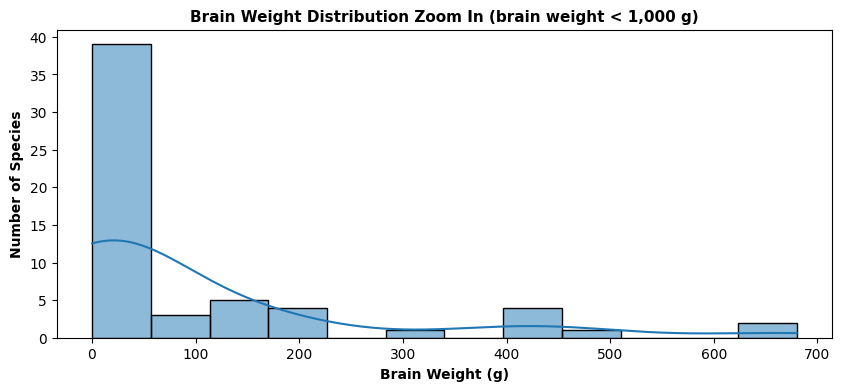

In [16]:
plot_histogram(df[df["brain_wt"] < 1000]["brain_wt"], x_label="Brain Weight (g)", title="Brain Weight Distribution Zoom In (brain weight < 1,000 g)")

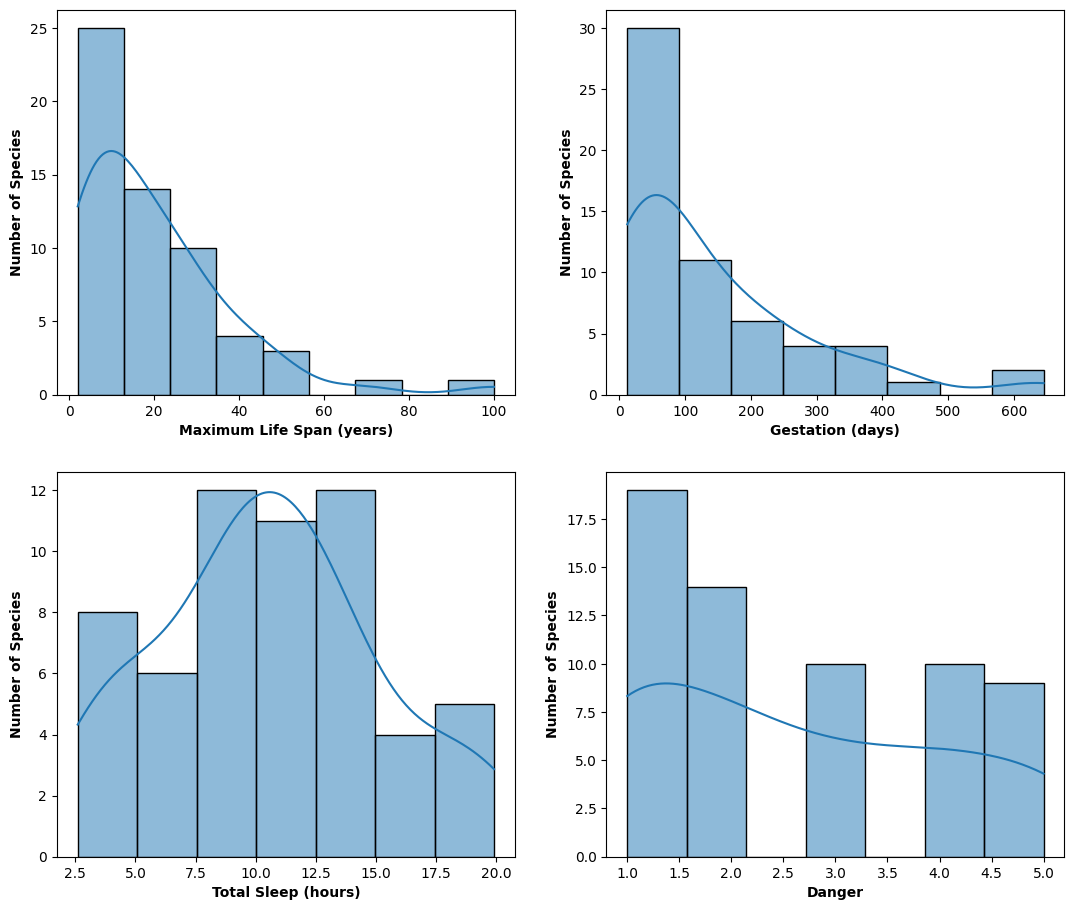

In [17]:
features = ["life_span", "gestation", "total_sleep", "danger"]

fig, axs = plt.subplots(2, 2, figsize=(13, 11))

ind = [(0, 0), (0, 1), (1, 0), (1, 1)]
feature_names = ["Maximum Life Span (years)", "Gestation (days)", "Total Sleep (hours)", "Danger"]

for (i, j), feature, feature_name in zip(ind, features, feature_names):
    data = df[feature].tolist()
    sns.histplot(data, kde=True, ax=axs[i, j])
    
    axs[i, j].set_xlabel(feature_name, fontsize=10, fontweight="bold")
    axs[i, j].set_ylabel("Number of Species", fontsize=10, fontweight="bold")

## 3. Sleep Structure Analysis

<font size="4"> We have two types of sleep in the dataset: deep sleep (non-dreaming) and REM sleep (dreaming).</font>

<font size="4"><u> Deep Sleep </u>  </font> </br>
<font size="3">Slow-wave sleep (SWS), often referred to as deep sleep, consists of stage three of non-rapid eye movement sleep. [[1]](https://en.wikipedia.org/wiki/Slow-wave_sleep)</font>

<font size="4"><u> REM sleep </u>  </font> </br>
<font size="3">Rapid eye movement sleep (REM sleep or REMS) is a unique phase of sleep in mammals and birds, characterized by random rapid movement of the eyes, accompanied by low muscle tone throughout the body, and the propensity of the sleeper to dream vividly. [[2]](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep#cite_note-MallickEtAl-25) </font>

<font size="3"> __It would be interesting to see what fraction of the sleep time is in the deep and REM sleep types.__ </font>

In [18]:
# Add two extra columns
df["rem_percent"] = df["dreaming"] / df["total_sleep"] * 100
df["deep_percent"] = df["non_dreaming"] / df["total_sleep"] * 100

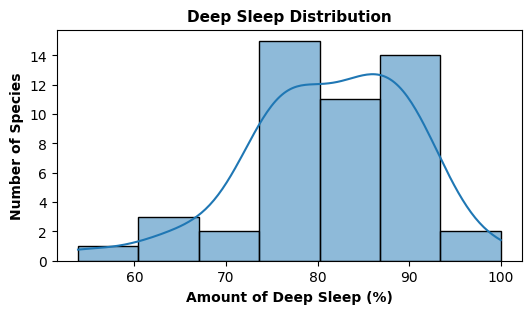

In [19]:
plot_histogram(df["deep_percent"], x_label="Amount of Deep Sleep (%)", title="Deep Sleep Distribution", fig_size=(6, 3))

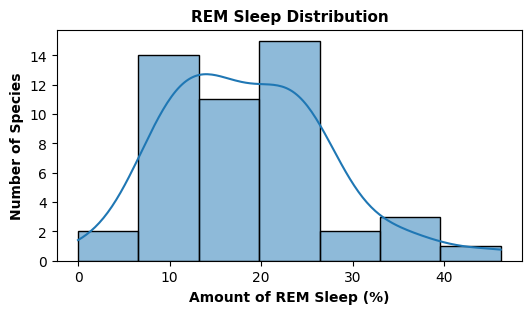

In [20]:
plot_histogram(df["rem_percent"], x_label="Amount of REM Sleep (%)", title="REM Sleep Distribution", fig_size=(6, 3))

In [21]:
df[df["deep_percent"] == 100]

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger,rem_percent,deep_percent
15,Echidna,3.0,25.0,8.6,0.0,8.6,50.0,28.0,2,2,2,0.0,100.0


* <font size="3"> The only specie that doesn't have REM sleep is Echidna.</font> </br>
<font size="3"> Echidna has been reported to have no REM sleep. [[3]](https://www.sciencedirect.com/science/article/abs/pii/016643289500023M#!)\
  However, [this study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1692309/) found that "despite the presence of a high-voltage cortical electroencephalogram (EEG), brainstem units fire in irregular bursts intermediate in intensity between the regular non-REM sleep pattern and the highly irregular REM sleep pattern seen in placentals".</font>

## 4. Correlation Search

### 4.1 Body/Brain Weight and Amount of Sleep

#### **Body Weight**

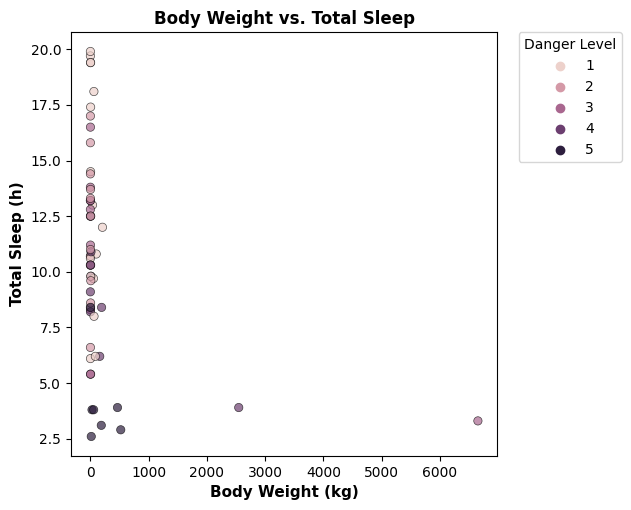

In [22]:
plot_scatterplot(df, x_axis="body_wt", y_axis="total_sleep", x_label="Body Weight (kg)", y_label="Total Sleep (h)", 
                 title="Body Weight vs. Total Sleep", hue="danger", legend_title="Danger Level")

In [24]:
df["body_wt_log"] = np.log(df["body_wt"])

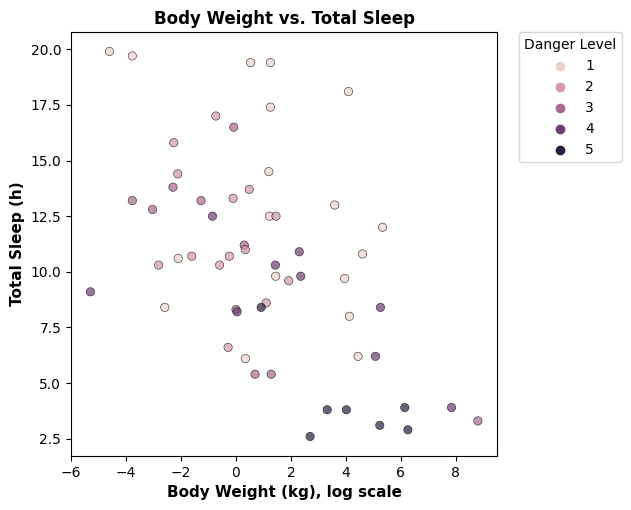

In [25]:
plot_scatterplot(df, x_axis="body_wt_log", y_axis="total_sleep", x_label="Body Weight (kg), log scale", y_label="Total Sleep (h)", 
                 title="Body Weight vs. Total Sleep", hue="danger", legend_title="Danger Level")

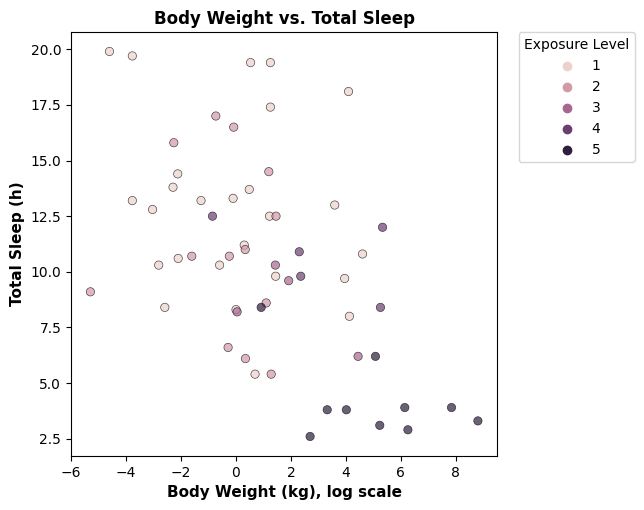

In [26]:
plot_scatterplot(df, x_axis="body_wt_log", y_axis="total_sleep", x_label="Body Weight (kg), log scale", y_label="Total Sleep (h)", 
                 title="Body Weight vs. Total Sleep", hue="exposure", legend_title="Exposure Level")

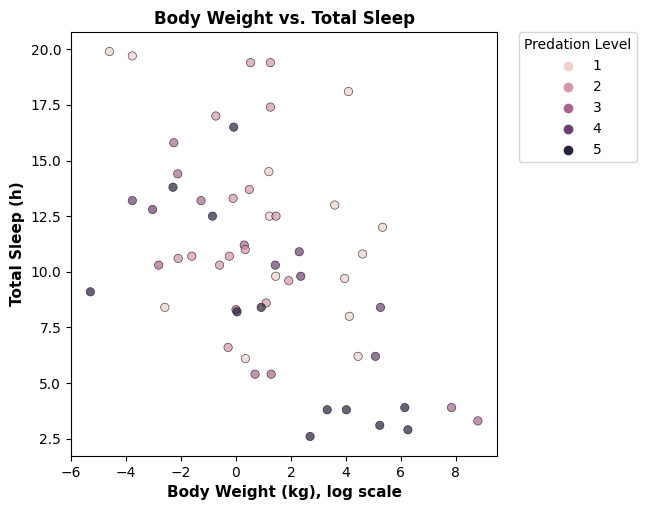

In [27]:
plot_scatterplot(df, x_axis="body_wt_log", y_axis="total_sleep", x_label="Body Weight (kg), log scale", y_label="Total Sleep (h)", 
                 title="Body Weight vs. Total Sleep", hue="predation", legend_title="Predation Level")

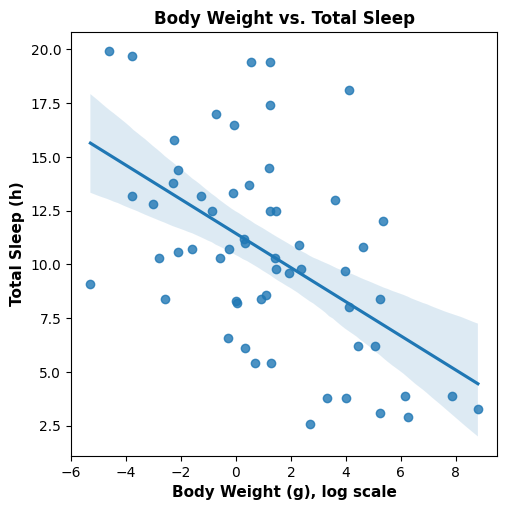

In [28]:
plot_regplor(df, x_axis="body_wt_log", y_axis="total_sleep", 
             x_label="Body Weight (g), log scale", y_label="Total Sleep (h)", 
             title="Body Weight vs. Total Sleep")

#### **Brain Weight**

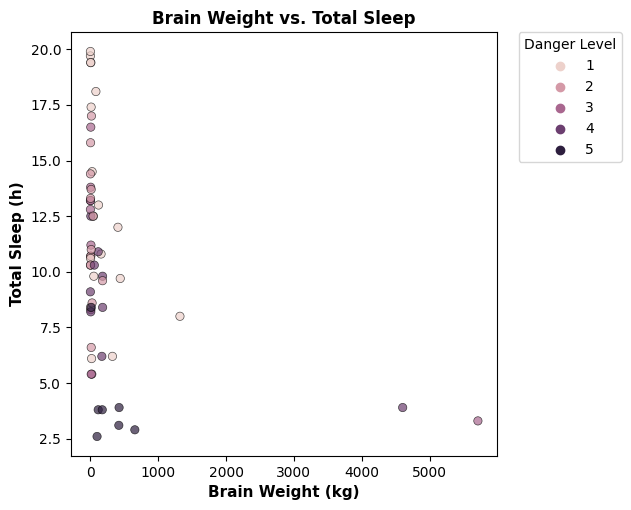

In [29]:
plot_scatterplot(df, x_axis="brain_wt", y_axis="total_sleep", x_label="Brain Weight (kg)", y_label="Total Sleep (h)", 
                 title="Brain Weight vs. Total Sleep", hue="danger", legend_title="Danger Level")

In [30]:
df["brain_wt_log"] = np.log(df["brain_wt"])

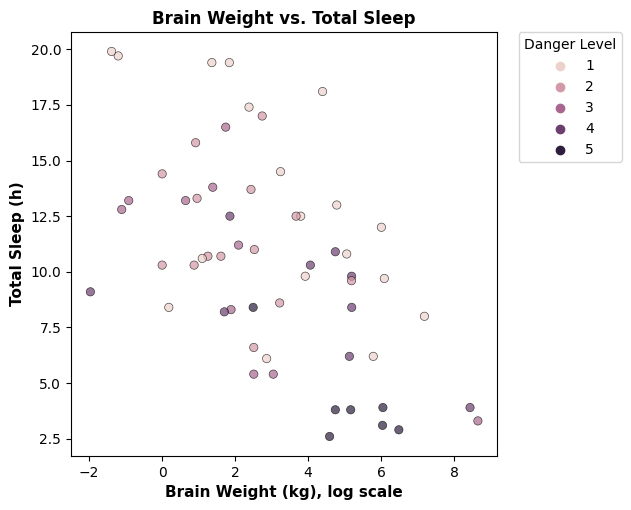

In [31]:
plot_scatterplot(df, x_axis="brain_wt_log", y_axis="total_sleep", x_label="Brain Weight (kg), log scale", y_label="Total Sleep (h)", 
                 title="Brain Weight vs. Total Sleep", hue="danger", legend_title="Danger Level")

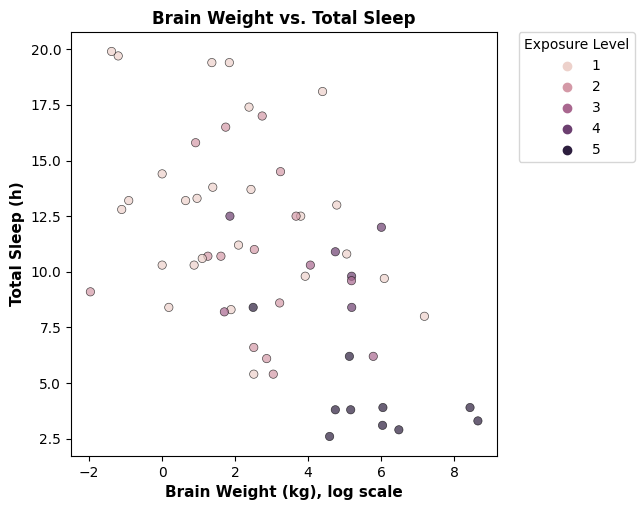

In [32]:
plot_scatterplot(df, x_axis="brain_wt_log", y_axis="total_sleep", x_label="Brain Weight (kg), log scale", y_label="Total Sleep (h)", 
                 title="Brain Weight vs. Total Sleep", hue="exposure", legend_title="Exposure Level")

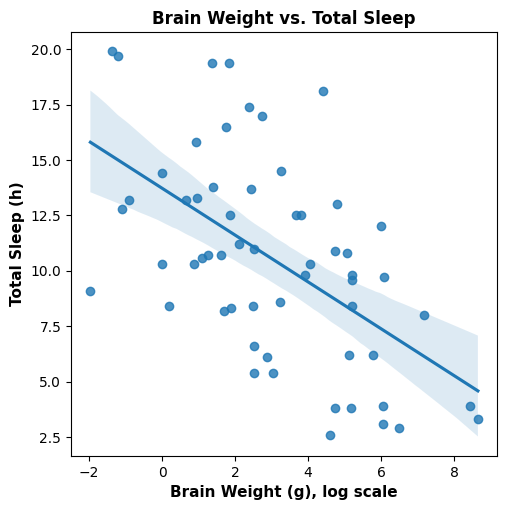

In [33]:
plot_regplor(df, x_axis="brain_wt_log", y_axis="total_sleep", 
             x_label="Brain Weight (g), log scale", y_label="Total Sleep (h)", 
             title="Brain Weight vs. Total Sleep")

* <font size="4">
We can see that there is virtually no correlation between body/brain weight and sleep amount. <br>
However, if we apply a log scale for body/brain weight features, we see a moderate anticorrelation. We can also notice that danger level, especially exposure level, plays a significant role in it. This may be explained by the simple fact that large animals are just more visible and therefore are at greater risk.</font>

### 4.2 Gestation and Amount of Sleep

In [34]:
df["gestation_log"] = np.log(df["gestation"])

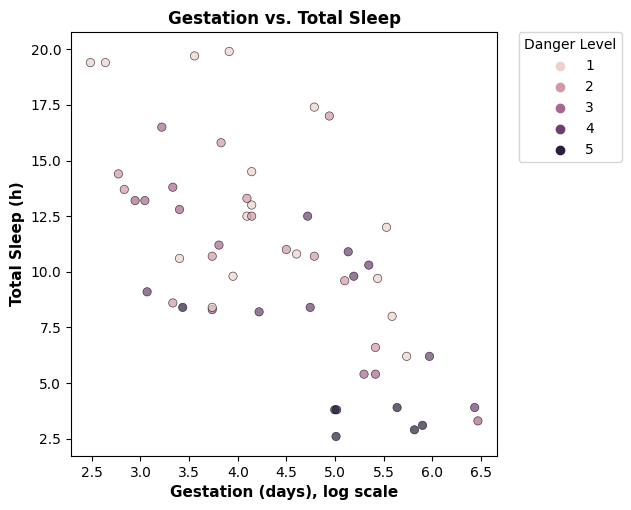

In [35]:
plot_scatterplot(df, x_axis="gestation_log", y_axis="total_sleep", x_label="Gestation (days), log scale", y_label="Total Sleep (h)", 
                 title="Gestation vs. Total Sleep", hue="danger", legend_title="Danger Level")

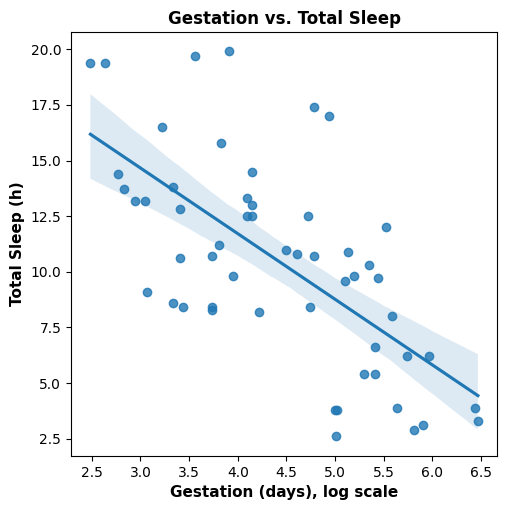

In [36]:
plot_regplor(df, x_axis="gestation_log", y_axis="total_sleep", 
             x_label="Gestation (days), log scale", y_label="Total Sleep (h)", 
             title="Gestation vs. Total Sleep")

### 4.3 Danger Level and Amount of Sleep

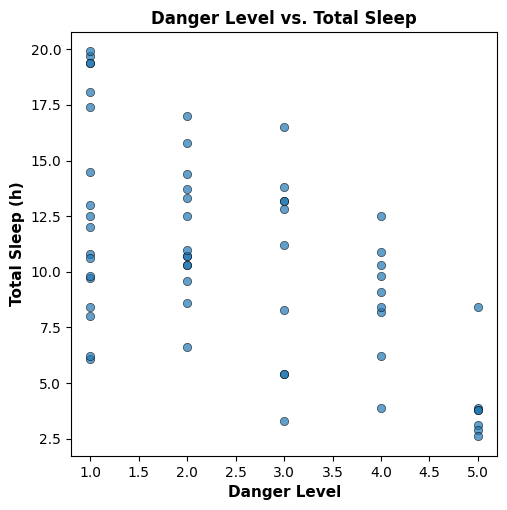

In [37]:
plot_scatterplot(df, x_axis="danger", y_axis="total_sleep", x_label="Danger Level", y_label="Total Sleep (h)", 
                 title="Danger Level vs. Total Sleep")

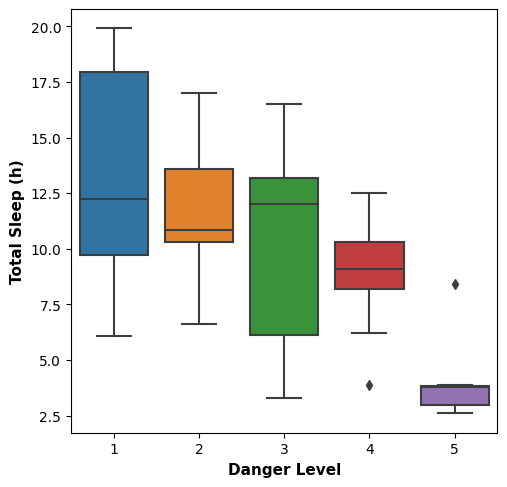

In [38]:
plot_boxplot(df, x_axis="danger", y_axis="total_sleep", x_label="Danger Level", y_label="Total Sleep (h)")

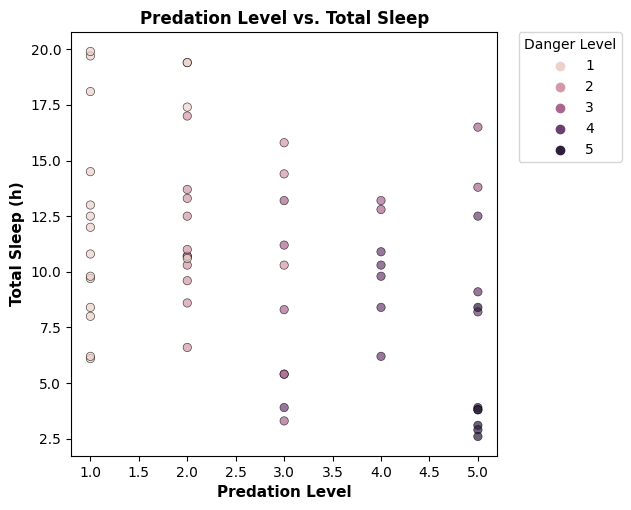

In [39]:
plot_scatterplot(df, x_axis="predation", y_axis="total_sleep", x_label="Predation Level", y_label="Total Sleep (h)", 
                 title="Predation Level vs. Total Sleep", hue="danger", legend_title="Danger Level")

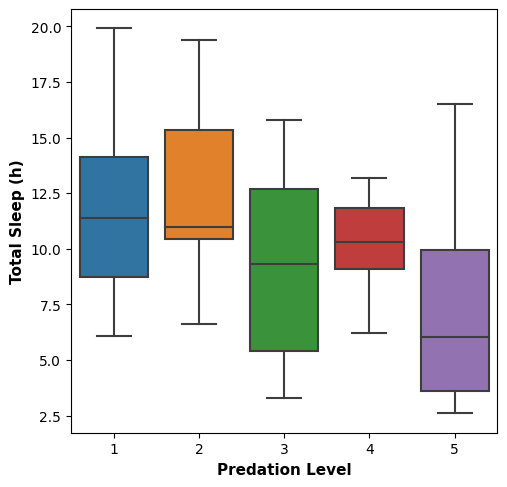

In [40]:
plot_boxplot(df, x_axis="predation", y_axis="total_sleep", x_label="Predation Level", y_label="Total Sleep (h)")

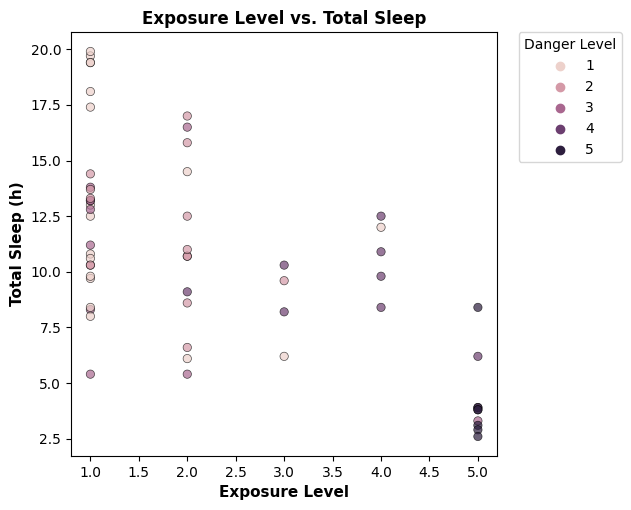

In [41]:
plot_scatterplot(df, x_axis="exposure", y_axis="total_sleep", x_label="Exposure Level", y_label="Total Sleep (h)", 
                 title="Exposure Level vs. Total Sleep", hue="danger", legend_title="Danger Level")

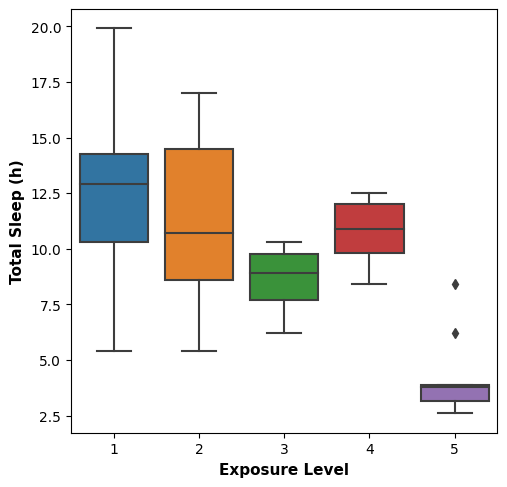

In [42]:
plot_boxplot(df, x_axis="exposure", y_axis="total_sleep", x_label="Exposure Level", y_label="Total Sleep (h)")

* <font size="4">As we can see from the charts, danger level, especially exposure, plays a crucial role in sleep amount.</font>

### 4.4 Correlation Matrix

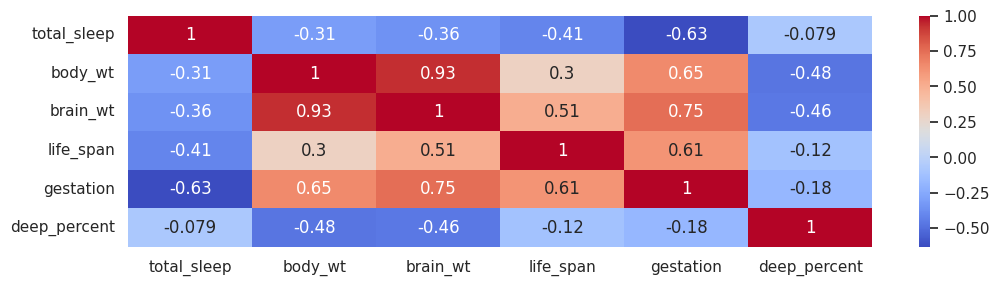

In [43]:
plot_heatmap(df, features=["total_sleep", "body_wt", "brain_wt", "life_span", "gestation", "deep_percent"])

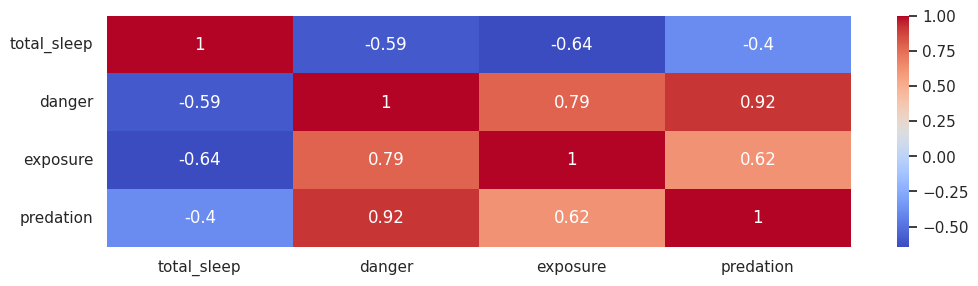

In [44]:
plot_heatmap(df, features=["total_sleep", "danger", "exposure", "predation"])

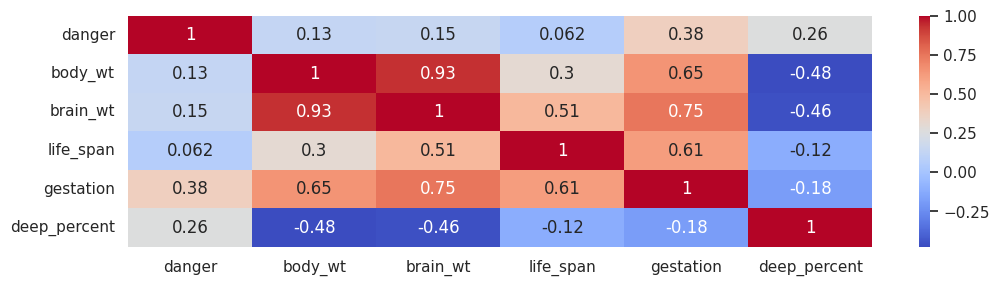

In [45]:
plot_heatmap(df, features=["danger", "body_wt", "brain_wt", "life_span", "gestation", "deep_percent"])

## 5. Decision Tree and Feature Importance

In [46]:
df_preprocessed = df.dropna()
df_preprocessed.shape

(42, 16)

In [47]:
feature_names = ["brain_wt", "life_span", "gestation", "predation", "exposure", "danger"]
X = df_preprocessed[feature_names].to_numpy()
y = df_preprocessed[["total_sleep"]].to_numpy()
y = y.ravel()

X.shape, y.shape

((42, 6), (42,))

In [48]:
tree_reg = DecisionTreeRegressor(random_state=0) 
tree_reg.fit(X, y)

DecisionTreeRegressor(random_state=0)

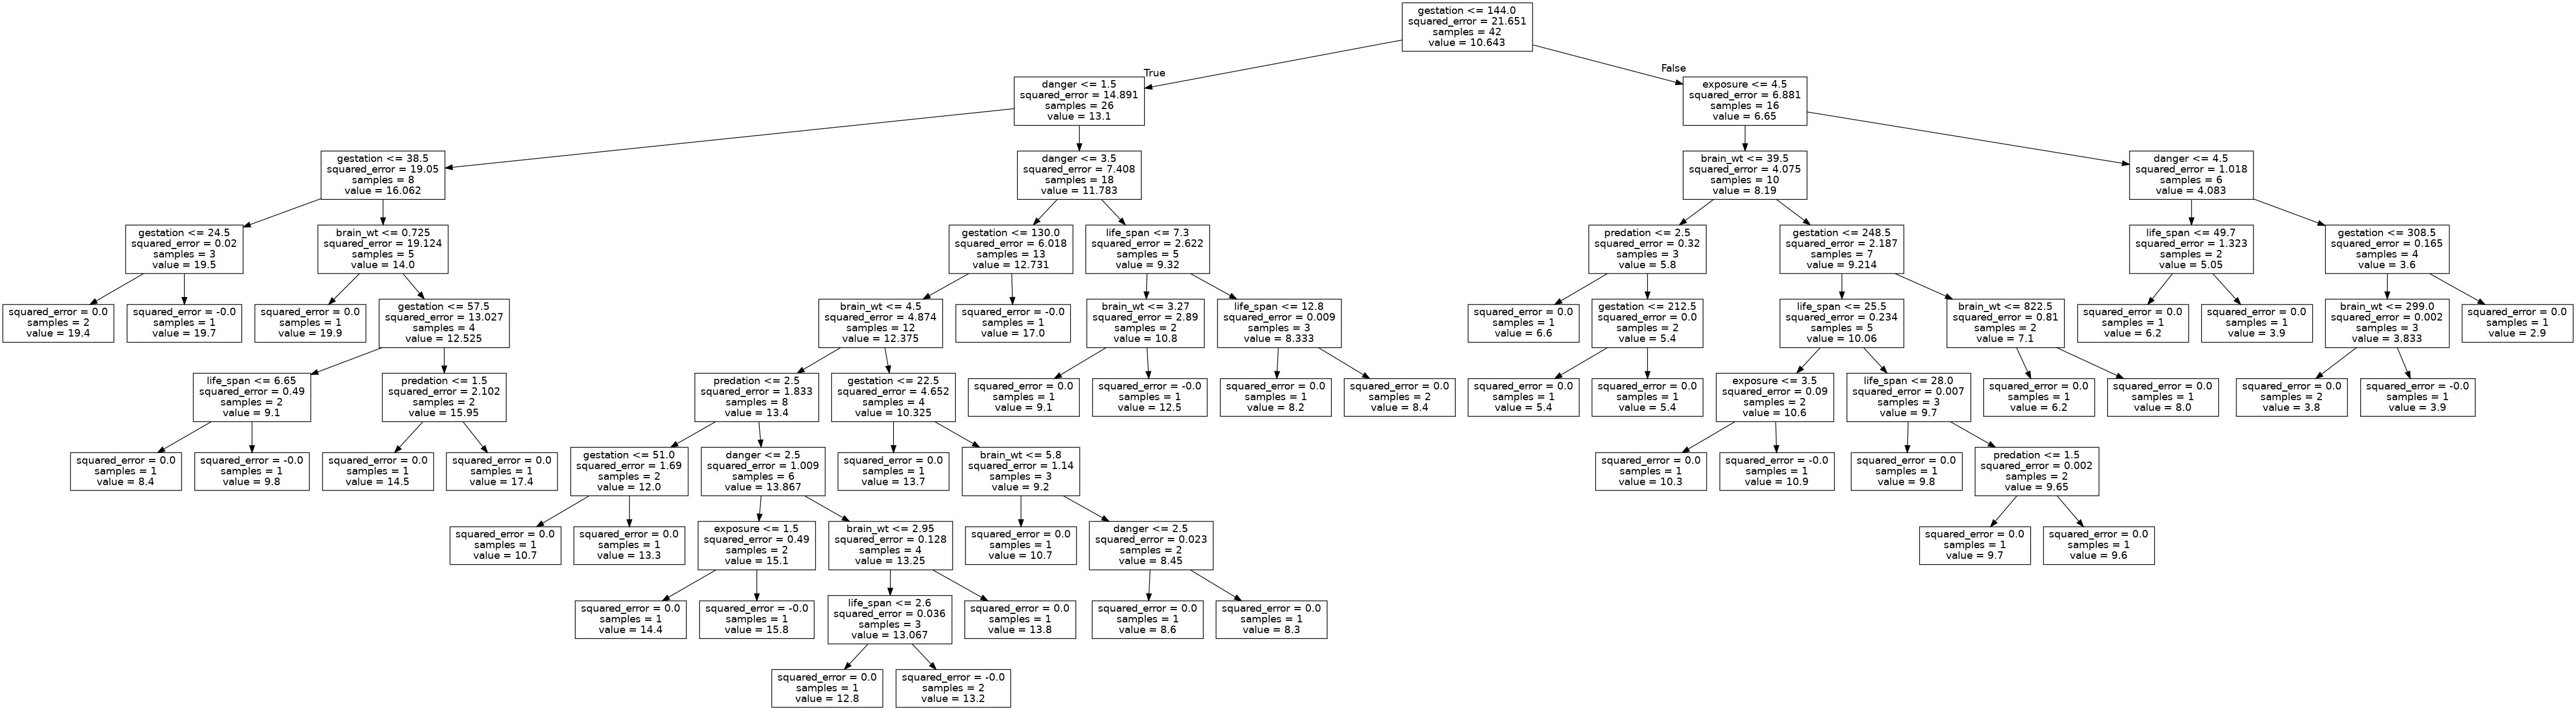

In [49]:
dot_file = data_dir + "sleep_in_mammals_tree.dot"
export_graphviz(tree_reg, out_file=dot_file, feature_names=feature_names) 

s = Source.from_file(dot_file)
s.render(data_dir + "sleep_in_mammals_tree", format="jpg", view=False)
Image(filename=data_dir + "sleep_in_mammals_tree.jpg") 

In [50]:
feature_importances = []
for feature, importance in zip(feature_names, tree_reg.feature_importances_):
    feature_importances.append((feature, importance))

feature_importances.sort(key=lambda item: item[1], reverse=True)

In [51]:
print("feature : importance")
print("-------------------")
for feature, importance in feature_importances:
    print(feature, ":", np.round(importance, 4))

feature : importance
-------------------
gestation : 0.6238
danger : 0.1659
brain_wt : 0.1148
exposure : 0.0708
life_span : 0.0132
predation : 0.0114


## 6. Conclusions



1. There is a **moderate negative correlation** between **sleep amount and body/brain weight**. It's especially noticeable if we switch to a log scale for body/brain weight features.\
    Pearson's correlation = -0.31, -0.36 for body and brain weight features correspondingly. 
2. There is a **moderate negative correlation** between **sleep amount and gestation**. \
   Pearson's correlation = -0.63
   The Decision Tree algorithm chose gestation as **the most important feature in the prediction of sleep amount**. \
   [This research](https://www.dovepress.com/negative-correlation-between-gestation-and-sleep-durations-in-mammals-peer-reviewed-fulltext-article-OAAP) says that "those mammals, which have longer gestation period, experience less sleep".
3. There is **no correlation** between **sleep amount and deep/REM sleep percentage**. 
4. There is a **moderate negative correlation** between **sleep amount and danger level, especially exposure**. \
   Pearson's correlation = -0.59, -0.64, -0.4 for danger, exposure, and predation correspondingly. \
   Moreover, the correlation between predation and sleep is less than the correlation between exposure and sleep.\
   It can be explained by the fact that even if some animals have a high level of predation but they can hide, the overall danger is less.
5. There is a **low correlation** between **danger level and gestation period**.
   Pearson's correlation = 0.38
6. Neither **deep nor REM sleep amount depend on danger**.